# K-prototypes 
A combination of the regular k-means model (for numerical data) and the more recent k-modes model (for categorical data), being able to process both numerical and categorical features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import NearMiss
from collections import Counter

import random
from numpy.random import seed
import tensorflow as tf
from kmodes.kprototypes import KPrototypes

## Import and preprocess data

In [2]:
# function to reset all RNG's to seed 23
def reset_random_seeds():
   tf.random.set_seed(23) # tensorflow's seed
   np.random.seed(23) # numpy's seed
   random.seed(23) # python's seed

# import data
data = pd.read_csv (r'bank-additional-full.csv', sep = ';', engine= 'python')
#data = data.head(1000)
length = data.shape[0]
data.head()

# select variables
cats_to_use = ['age', 'default', 'contact', 'month', 'previous', 'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed', 'y']
data = data[cats_to_use]

# 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
#       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'


In [3]:
data.head()

,age,default,contact,month,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,56,no,telephone,may,0,nonexistent,1.1,4.857,5191.0,no
1,57,unknown,telephone,may,0,nonexistent,1.1,4.857,5191.0,no
2,37,no,telephone,may,0,nonexistent,1.1,4.857,5191.0,no
3,40,no,telephone,may,0,nonexistent,1.1,4.857,5191.0,no
4,56,no,telephone,may,0,nonexistent,1.1,4.857,5191.0,no


In [3]:
# save lists of categorical and numerical variables
cat_cols = ['default', 'contact', 'month', 'poutcome', 'y']
num_cols = ['age', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']

# create column transformer to 1 one-hot-encode cat vars and 2 noralise num vars
# ct = make_column_transformer(
#     (OneHotEncoder(drop='first'), cat_cols), # drop first column (reference)
#     (StandardScaler(), num_cols),
# )

# transform base table (pandas df -> numpy array)
#base = ct.fit_transform(data)

# convert base table to p.df for ease of use (numpy array -> pandas df)
# base_temp = pd.DataFrame(base, columns=ct.get_feature_names_out().tolist())
# base_temp

# # seperate base table into X and y and convert to numpy array (base pandas df -> y numpy array + X numpy array)
# y = base_temp['onehotencoder__y_yes'].values
# X = base_temp.drop(columns=['onehotencoder__y_yes']).values

y = data["y"].values
X = data.drop(columns=['y']).values

# save and check dimensions of X 
(X_length, X_vars) = X.shape
X_length, X_vars

# reset RNG's
reset_random_seeds()

(X_length, X_vars) = X.shape
X_length, X_vars

(41188, 9)

In [4]:
data.head()
train_features, test_features, train_targets, test_targets = train_test_split(X, y.ravel(), test_size=0.2,
                                                                                  random_state=23)
 
# for col in data.columns:
#     print(col)
train_features

array([[37, 'no', 'cellular', ..., 1.4, 4.963, 5228.1],
       [26, 'no', 'telephone', ..., 1.4, 4.864, 5228.1],
       [42, 'no', 'cellular', ..., -1.8, 1.291, 5099.1],
       ...,
       [42, 'no', 'telephone', ..., 1.4, 4.961, 5228.1],
       [31, 'no', 'cellular', ..., -0.1, 4.076, 5195.8],
       [48, 'no', 'telephone', ..., 1.4, 4.967, 5228.1]], dtype=object)

## Select number of clusters

In [5]:
categorical_features_idx = [1,2,3,5]

<function matplotlib.pyplot.show(close=None, block=None)>

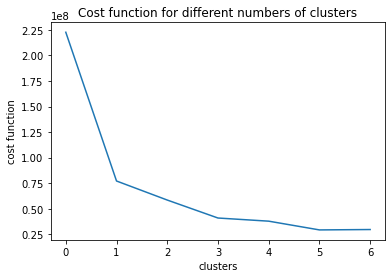

In [6]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, verbose=0)
    kproto.fit_predict(train_features, categorical=categorical_features_idx)
    cost.append(kproto.cost_)

plt.plot(cost)
plt.title('Cost function for different numbers of clusters')
plt.ylabel('cost function')
plt.xlabel('clusters')
plt.show

In [7]:
categorical_features_idx = [1,2,3,5]

In [8]:
mark_array=train_features

In [9]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 9831, ncost: 29251562.953652702
Run: 1, iteration: 2/20, moves: 3574, ncost: 27189146.75218023
Run: 1, iteration: 3/20, moves: 2135, ncost: 27142196.90793816
Run: 1, iteration: 4/20, moves: 11, ncost: 27142165.22838746
Run: 1, iteration: 5/20, moves: 8, ncost: 27142160.558314834
Run: 1, iteration: 6/20, moves: 2, ncost: 27142159.54270647
Run: 1, iteration: 7/20, moves: 0, ncost: 27142159.54270647
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 5346, ncost: 27033840.62597534
Run: 2, iteration: 2/20, moves: 874, ncost: 27020054.435771655
Run: 2, iteration: 3/20, moves: 113, ncost: 27019778.338314265
Run: 2, iteration: 4/20, moves: 0, ncost: 27019778.338314265
Init: initializing centro

In [10]:
mark_array=train_features

In [11]:
#prediction
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [12]:
print(clusters.mean())

2.6298937784522005


In [13]:
train = train_features
print(train.shape)

(32950, 9)


In [14]:
train = np.insert(train, 9, clusters, axis=1)
train = np.insert(train, 10, train_targets, axis=1)
train.shape

(32950, 11)

In [15]:
df_train = pd.DataFrame(train)
df_train.columns = ["age", "default", "contact", "month","previous", "poutcome", "emp.var.rate", "euribor3m", "nr.employed", 'cluster', 'y']

#print(df_train)

In [16]:
# save lists of categorical and numerical variables
cat_cols = ['default', 'contact', 'month', 'poutcome', 'cluster', 'y']
num_cols = ['age', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']

# create column transformer to 1 one-hot-encode cat vars and 2 noralise num vars
ct = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_cols), # drop first column (reference)
    (StandardScaler(), num_cols)
)

# transform base table (pandas df -> numpy array)
base = ct.fit_transform(df_train)

# convert base table to p.df for ease of use (numpy array -> pandas df)
base_temp = pd.DataFrame(base, columns=ct.get_feature_names_out().tolist())
base_temp

,onehotencoder__default_unknown,onehotencoder__default_yes,onehotencoder__contact_telephone,onehotencoder__month_aug,onehotencoder__month_dec,onehotencoder__month_jul,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,...,onehotencoder__cluster_3,onehotencoder__cluster_4,onehotencoder__cluster_5,onehotencoder__cluster_6,onehotencoder__y_yes,standardscaler__age,standardscaler__previous,standardscaler__emp.var.rate,standardscaler__euribor3m,standardscaler__nr.employed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.292103,-0.347773,0.837495,0.772478,0.843311
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.346056,-0.347773,0.837495,0.715389,0.843311
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.186967,-0.347773,-1.198797,-1.345019,-0.941946
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.049292,-0.347773,0.646592,0.712505,0.329877
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.761850,-0.347773,-0.117017,0.286353,0.396305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.761850,-0.347773,0.646592,0.711352,0.329877
32946,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.058615,-0.347773,0.837495,0.771325,0.843311
32947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.186967,-0.347773,0.837495,0.771325,0.843311
32948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,-0.866987,-0.347773,-0.117017,0.260980,0.396305


In [17]:
base_temp.to_csv(r'bank-additional-trainclusters.csv', index = False)

In [18]:
mark_array_test=test_features

In [19]:
#prediction
clusters_pred = kproto.predict(mark_array_test, categorical=categorical_features_idx)

In [20]:
print(clusters_pred.mean())

2.6529497450837582


In [21]:
test = test_features
print(test.shape)

(8238, 9)


In [22]:
test = np.insert(test, 9, clusters_pred, axis=1)
test = np.insert(test, 10, test_targets, axis=1)
test.shape

(8238, 11)

In [23]:
df_test = pd.DataFrame(test)
df_test.columns = ["age", "default", "contact", "month","previous", "poutcome", "emp.var.rate", "euribor3m", "nr.employed", 'cluster', 'y']

#print(df_test)

# transform base table (pandas df -> numpy array)
base_test = ct.fit_transform(df_test)

# convert base table to p.df for ease of use (numpy array -> pandas df)
base_temp_test = pd.DataFrame(base_test, columns=ct.get_feature_names_out().tolist())

In [24]:
base_temp_test.insert(loc=1, column='onehotencoder__default_yes', value=0.0)
base_temp_test

,onehotencoder__default_unknown,onehotencoder__default_yes,onehotencoder__contact_telephone,onehotencoder__month_aug,onehotencoder__month_dec,onehotencoder__month_jul,onehotencoder__month_jun,onehotencoder__month_mar,onehotencoder__month_may,onehotencoder__month_nov,...,onehotencoder__cluster_3,onehotencoder__cluster_4,onehotencoder__cluster_5,onehotencoder__cluster_6,onehotencoder__y_yes,standardscaler__age,standardscaler__previous,standardscaler__emp.var.rate,standardscaler__euribor3m,standardscaler__nr.employed
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.379031,-0.356365,0.845350,0.776820,0.852637
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.103724,-0.356365,0.654114,0.718627,0.338907
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.054888,-0.356365,0.845350,0.776244,0.852637
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.165785,-0.356365,-0.110831,0.311278,0.405374
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.151439,-0.356365,-1.895703,-1.355569,-1.250746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.779581,-0.356365,0.845350,0.777972,0.852637
8234,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.765235,-0.356365,-1.130758,-1.643076,-2.422216
8235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.551989,1.611284,-0.110831,0.235224,0.405374
8236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.200275,-0.356365,0.845350,0.780277,0.852637


In [25]:
# convert new base table to csv file
base_temp_test.to_csv(r'bank-additional-testclusters.csv', index = False)